# Solar-MACH
**Multi-spacecraft longitudinal configuration plotter**

- GitHub: https://github.com/jgieseler/solarmach
- PyPI: https://pypi.org/project/solarmach
- conda: https://anaconda.org/conda-forge/solarmach
- web app: https://solar-mach.github.io
---

## Local installation (not needed here)

In order to run it locally on your computer (that is, not on [pyhcschool.heliocloud.org](https://pyhcschool.heliocloud.org)), you need to install `solarmach` via pip:
``` bash
$ pip install solarmach
```

or via conda:
``` bash
$ conda install -c conda-forge solarmach
```
---

## Importing 

In [1]:
from solarmach import SolarMACH, print_body_list  # print_body_list only needed to get a list of available bodies/spacecraft

%config InlineBackend.figure_formats = ['svg']  # edit notebook plotting setting (optional)

---
## 1. Minimal example

Necessary options are a list of wanted spacecraft/bodies, the corresponding solar wind speeds (in km/s), and the date of interest:

In [2]:
body_list = ['Earth', 'Solar Orbiter', 'PSP']
vsw_list = [400, 400, 400]             # position-sensitive solar wind speed per body in body_list
date = '2022-6-1 12:00:00'

Initialize the SolarMACH object for these options:

In [3]:
sm1 = SolarMACH(date, body_list, vsw_list)

And produce the final plot:

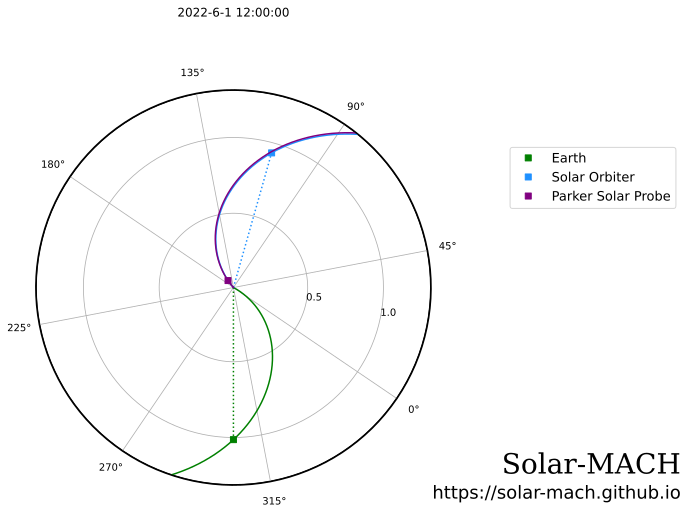

In [4]:
sm1.plot(plot_sun_body_line=True, show_earth_centered_coord=False)

---

## 2. Example with all the details

First, get a list of available bodies/spacecraft:

In [5]:
print(print_body_list().index)

Index(['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'L1', 'STEREO B',
       'STEREO A', 'SOHO', 'Solar Orbiter', 'PSP', 'BepiColombo', 'MAVEN',
       'Mars Express', 'MESSENGER', 'Juno', 'Cassini', 'Rosetta', 'Pioneer10',
       'Pioneer11', 'Ulysses', 'Voyager1', 'Voyager2'],
      dtype='object', name='Key')


Provide the necessary options, this time for more spacecraft:

In [6]:
body_list = ['Mercury', 'Venus', 'Earth', 'Mars', 'STEREO A', 'STEREO B', 'Solar Orbiter', 'PSP', 'BepiColombo']
vsw_list = len(body_list) * [350]        # position-sensitive solar wind speed per body in body_list
date = '2021-6-1 12:00:00'

Now we also want to indicate the position (in [Carrington coordinates](https://docs.sunpy.org/en/stable/generated/api/sunpy.coordinates.frames.HeliographicCarrington.html)) and direction of a flare, and the (assumed) solar wind speed at its location:

In [7]:
reference_long = 0                               # Carrington longitude of reference (None to omit)
reference_lat = 0                                # Carrington latitude of reference (None to omit)
reference_vsw = 400                              # define solar wind speed at reference

In addition, we explicitly provide all availabe plotting options:

In [8]:
plot_spirals = True                              # plot Parker spirals for each body
plot_sun_body_line = False                       # plot straight line between Sun and body
show_earth_centered_coord = False                # display Earth-aligned coordinate system
transparent = False                              # make output figure background transparent
numbered_markers = True                          # plot each body with a numbered marker
filename = f'Solar-MACH_{date.replace(" ", "_")}.png'  # define filename of output figure

Finally, initializing and plotting with these options. If `outfile` is provided, the plot will be saved next to the Notebook with the provided `filename`.

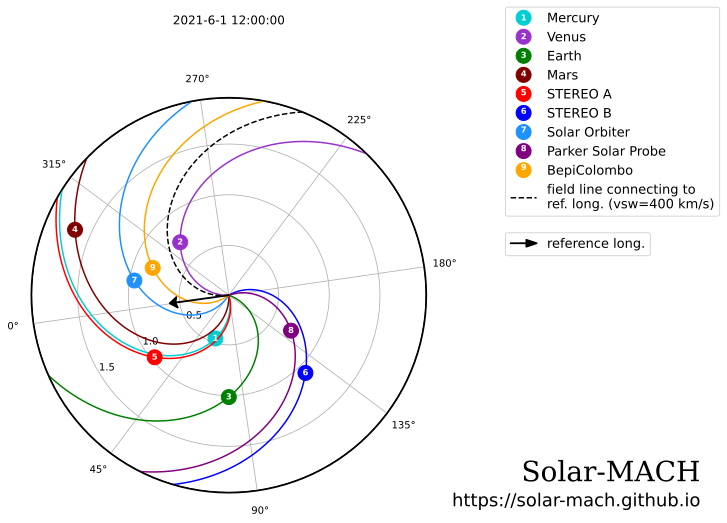

In [9]:
sm2 = SolarMACH(date, body_list, vsw_list, reference_long, reference_lat)

sm2.plot(plot_spirals=plot_spirals,
         plot_sun_body_line=plot_sun_body_line,
         show_earth_centered_coord=show_earth_centered_coord,
         reference_vsw=reference_vsw,
         transparent=transparent,
         numbered_markers=numbered_markers,
         outfile=filename
         )

All the data can also be obtained as a Pandas DataFrame for further use:

In [10]:
df = sm2.coord_table
display(df)

,Spacecraft/Body,Carrington Longitude (°),Latitude (°),Heliocentric Distance (AU),Longitudinal separation to Earth's longitude,Latitudinal separation to Earth's latitude,Vsw,Magnetic footpoint longitude (Carrington),Longitudinal separation between body and reference_long,Longitudinal separation between body's mangetic footpoint and reference_long,Latitudinal separation between body and reference_lat
0,Mercury,64.6,-3.4,0.5,-17.2,-2.8,350,96.6,64.6,96.6,-3.4
1,Venus,304.3,-2.4,0.7,-137.4,-1.8,350,354.7,-55.7,-5.3,-2.4
2,Earth,81.7,-0.6,1.0,0.0,0.0,350,152.9,81.7,152.9,-0.6
3,Mars,328.7,-4.6,1.7,-113.0,-4.0,350,85.0,-31.3,85.0,-4.6
4,STEREO A,31.7,-6.0,1.0,-50.1,-5.4,350,99.3,31.7,99.3,-6.0
5,STEREO B,126.3,4.5,1.1,44.6,5.1,350,202.5,126.3,-157.5,4.5
6,Solar Orbiter,342.9,-1.0,1.0,-98.8,-0.4,350,49.7,-17.1,49.7,-1.0
7,PSP,142.0,3.2,0.7,60.3,3.8,350,192.3,142.0,-167.7,3.2
8,BepiColombo,332.0,-3.5,0.8,-109.8,-2.9,350,28.6,-28.0,28.6,-3.5


In [11]:
df['Heliocentric Distance (AU)'].values

array([0.45657717, 0.71866253, 1.0140839 , 1.65743876, 0.9633026 ,
       1.08583866, 0.95207518, 0.7155775 , 0.80726552])

---

## 3. Example using Stonyhurst coordinates for reference

Let's take a look at the situation at the first ground-level enhancement (GLE) of solar cycle 25 on 28 October 2021 

First, we just provide some options as before:

In [12]:
body_list = ['STEREO-A', 'Earth', 'BepiColombo', 'PSP', 'Solar Orbiter', 'Mars']
vsw_list = [340, 300, 350, 350, 320, 350]        # position-sensitive solar wind speed per body in body_list
date = '2021-10-28 15:20:00'

# optional parameters
plot_spirals = True                              # plot Parker spirals for each body
plot_sun_body_line = True                        # plot straight line between Sun and body
show_earth_centered_coord = True                # display Earth-aligned coordinate system
transparent = False                              # make output figure background transparent
numbered_markers = True                          # plot each body with a numbered marker
filename = f'Solar-MACH_{date.replace(" ", "_")}.png'  # define filename of output figure

But now we want to provide the coordinates of the flare in [Stonyhurst coordinates](https://docs.sunpy.org/en/stable/generated/api/sunpy.coordinates.frames.HeliographicStonyhurst.html) (instead of [Carrington](https://docs.sunpy.org/en/stable/generated/api/sunpy.coordinates.frames.HeliographicCarrington.html)). For this, we have to convert them manually to Carrington coordinates for further use (at least at the moment). Note that this conversion is time-dependent.

In [13]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from sunpy.coordinates import frames

reference_long = 2                               # Stonyhurst longitude of reference (None to omit)
reference_lat = 26                               # Stonyhurst latitude of reference (None to omit)
coord = SkyCoord(reference_long*u.deg, reference_lat*u.deg, frame=frames.HeliographicStonyhurst, obstime=date)
coord = coord.transform_to(frames.HeliographicCarrington(observer='Sun'))
reference_long = coord.lon.value                 # Carrington longitude of reference
reference_lat = coord.lat.value                  # Carrington latitude of reference

reference_vsw = 300                              # define solar wind speed at reference

Finally, initializing and plotting with these options:

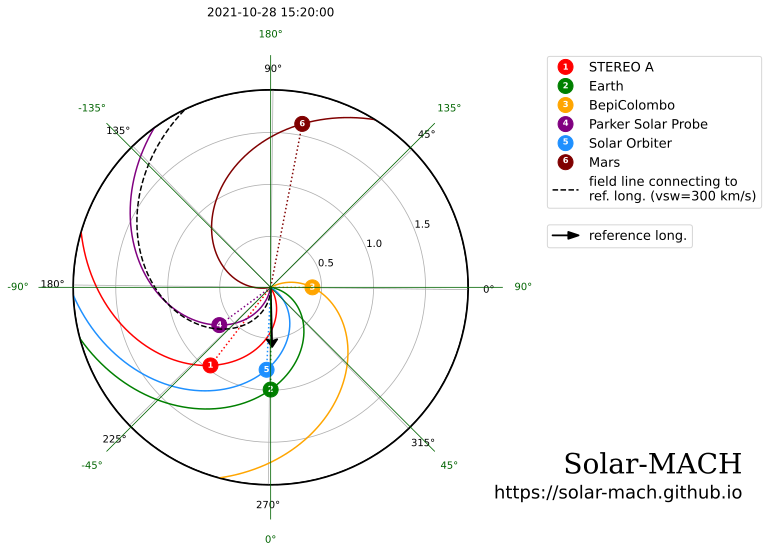

In [14]:
sm3 = SolarMACH(date, body_list, vsw_list, reference_long, reference_lat)
sm3.plot(plot_spirals=plot_spirals,
         plot_sun_body_line=plot_sun_body_line,
         show_earth_centered_coord=show_earth_centered_coord,
         reference_vsw=reference_vsw,
         transparent=transparent,
         numbered_markers=numbered_markers,
         outfile=filename
         )

---
## 4. Only obtain data as Pandas DataFrame

We can also just obtain a table with the spatial data, without producing a plot at all.

First provide necessary options:

In [15]:
body_list = ['STEREO-A', 'Earth', 'BepiColombo', 'PSP', 'Solar Orbiter', 'Mars']
vsw_list = [400, 400, 400, 400, 400, 400]        # position-sensitive solar wind speed per body in body_list
date = '2022-6-1 12:00:00'

Then initialize `SolarMACH` and obtain data as Pandas DataFrame:

In [16]:
sm4 = SolarMACH(date, body_list, vsw_list)
df = sm4.coord_table
display(df)

,Spacecraft/Body,Carrington Longitude (°),Latitude (°),Heliocentric Distance (AU),Longitudinal separation to Earth's longitude,Latitudinal separation to Earth's latitude,Vsw,Magnetic footpoint longitude (Carrington)
0,STEREO-A,275.7,-4.0,1.0,-28.5,-3.4,400,334.7
1,Earth,304.2,-0.6,1.0,0.0,0.0,400,6.5
2,BepiColombo,330.3,-2.0,0.6,26.1,-1.3,400,5.3
3,PSP,162.1,-2.1,0.1,-142.0,-1.5,400,166.3
4,Solar Orbiter,108.4,2.1,0.9,-195.8,2.7,400,165.7
5,Mars,16.9,4.9,1.4,-287.3,5.5,400,101.9


If we also provide the `reference` information, it will be available in the table, too:

In [17]:
sm4 = SolarMACH(date, body_list, vsw_list, reference_long=273, reference_lat=7)
df = sm4.coord_table
display(df)

,Spacecraft/Body,Carrington Longitude (°),Latitude (°),Heliocentric Distance (AU),Longitudinal separation to Earth's longitude,Latitudinal separation to Earth's latitude,Vsw,Magnetic footpoint longitude (Carrington),Longitudinal separation between body and reference_long,Longitudinal separation between body's mangetic footpoint and reference_long,Latitudinal separation between body and reference_lat
0,STEREO-A,275.7,-4.0,1.0,-28.5,-3.4,400,334.7,2.7,61.7,-11.0
1,Earth,304.2,-0.6,1.0,0.0,0.0,400,6.5,31.2,93.5,-7.6
2,BepiColombo,330.3,-2.0,0.6,26.1,-1.3,400,5.3,57.3,92.3,-9.0
3,PSP,162.1,-2.1,0.1,-142.0,-1.5,400,166.3,-110.9,-106.7,-9.1
4,Solar Orbiter,108.4,2.1,0.9,-195.8,2.7,400,165.7,-164.6,-107.3,-4.9
5,Mars,16.9,4.9,1.4,-287.3,5.5,400,101.9,-256.1,-171.1,-2.1


---
# 5. Ideas for further usage

## 5.1 Loop over multiple datetimes (plots)

This might be useful to either:

- read-in an *event catalog*, and loop over those datetimes to quickly get the constellations of all these events,
- create a series of daily constellation plots, and combine them into one animation:

In [ ]:
body_list = ['Mercury', 'Venus', 'Earth', 'Mars', 'STEREO A', 'STEREO B', 'Solar Orbiter', 'PSP', 'BepiColombo']
vsw_list = len(body_list) * [350]                # position-sensitive solar wind speed per body in body_list
plot_spirals = True                              # plot Parker spirals for each body
plot_sun_body_line = False                       # plot straight line between Sun and body
show_earth_centered_coord = True                 # display Earth-aligned coordinate system
transparent = False                              # make output figure background transparent
numbered_markers = True                          # plot each body with a numbered marker

for i in range(1,31,1):    
    j = str(i).rjust(2, '0')
    date = f'2022-6-{j} 12:00:00'
    filename = f'Solar-MACH_{date.replace(" ", "_")}.png'  # define filename of output figure

    sm5 = SolarMACH(date, body_list, vsw_list)
    sm5.plot(plot_spirals=plot_spirals,
             plot_sun_body_line=plot_sun_body_line,
             show_earth_centered_coord=show_earth_centered_coord,
             transparent=transparent,
             numbered_markers=numbered_markers,
             outfile=filename
             )

Get a sorted list of the files just created using `glob`:

In [19]:
import glob
files = sorted(glob.glob(filename.replace(f'{i}', '*')))

Build an animated GIF out of these files using `imageio`:

In [20]:
import imageio
with imageio.get_writer('solarmach.gif', mode='I') as writer:
    for filename in files:
        image = imageio.imread(filename)
        writer.append_data(image)

![Animated GIF](solarmach.gif)

## 5.2 Loop over multiple datetimes (only data)

For example, to look for spacecraft alignments, like *"When are PSP and Solar Orbiter at the same magnetic footpoint?"*

In [22]:
body_list = ['Mercury', 'Venus', 'Earth', 'Mars', 'STEREO A', 'Solar Orbiter', 'PSP', 'BepiColombo']
vsw_list = len(body_list) * [350]                # position-sensitive solar wind speed per body in body_list

df = []
dates = []
for i in range(1,31,1):
    date = f'2022-6-{i} 12:00:00'
    filename = f'Solar-MACH_{date.replace(" ", "_")}.png'  # define filename of output figure

    sm6 = SolarMACH(date, body_list, vsw_list)
    df = df + [sm6.coord_table]
    dates = dates + [date]

In [23]:
display(df[0])
display(df[1])
display(df[2])

,Spacecraft/Body,Carrington Longitude (°),Latitude (°),Heliocentric Distance (AU),Longitudinal separation to Earth's longitude,Latitudinal separation to Earth's latitude,Vsw,Magnetic footpoint longitude (Carrington)
0,Mercury,323.9,-2.9,0.5,19.7,-2.2,350,356.4
1,Venus,31.7,3.8,0.7,-272.5,4.5,350,82.8
2,Earth,304.2,-0.6,1.0,0.0,0.0,350,15.3
3,Mars,16.9,4.9,1.4,-287.3,5.5,350,114.0
4,STEREO A,275.7,-4.0,1.0,-28.5,-3.4,350,343.2
5,Solar Orbiter,108.4,2.1,0.9,-195.8,2.7,350,173.9
6,PSP,162.1,-2.1,0.1,-142.0,-1.5,350,166.9
7,BepiColombo,330.3,-2.0,0.6,26.1,-1.3,350,10.3


,Spacecraft/Body,Carrington Longitude (°),Latitude (°),Heliocentric Distance (AU),Longitudinal separation to Earth's longitude,Latitudinal separation to Earth's latitude,Vsw,Magnetic footpoint longitude (Carrington)
0,Mercury,312.5,-2.8,0.5,21.5,-2.3,350,344.9
1,Venus,19.1,3.8,0.7,-271.8,4.4,350,70.2
2,Earth,291.0,-0.5,1.0,0.0,0.0,350,2.1
3,Mars,3.3,4.9,1.4,-287.6,5.4,350,100.5
4,STEREO A,262.6,-3.9,1.0,-28.4,-3.4,350,330.0
5,Solar Orbiter,95.0,2.0,0.9,-196.0,2.5,350,160.8
6,PSP,228.6,-3.5,0.1,-62.3,-3.0,350,233.6
7,BepiColombo,318.2,-1.9,0.6,27.2,-1.4,350,357.7


,Spacecraft/Body,Carrington Longitude (°),Latitude (°),Heliocentric Distance (AU),Longitudinal separation to Earth's longitude,Latitudinal separation to Earth's latitude,Vsw,Magnetic footpoint longitude (Carrington)
0,Mercury,301.1,-2.7,0.5,23.4,-2.3,350,333.5
1,Venus,6.5,3.9,0.7,-271.2,4.2,350,57.6
2,Earth,277.7,-0.4,1.0,0.0,0.0,350,348.9
3,Mars,349.8,4.9,1.4,72.1,5.3,350,86.9
4,STEREO A,249.4,-3.8,1.0,-28.3,-3.4,350,316.9
5,Solar Orbiter,81.6,2.0,0.9,-196.2,2.4,350,147.7
6,PSP,258.3,-1.5,0.1,-19.4,-1.1,350,266.0
7,BepiColombo,306.1,-1.8,0.6,28.3,-1.4,350,345.0


In [24]:
display(dates)

['2022-6-1 12:00:00',
 '2022-6-2 12:00:00',
 '2022-6-3 12:00:00',
 '2022-6-4 12:00:00',
 '2022-6-5 12:00:00',
 '2022-6-6 12:00:00',
 '2022-6-7 12:00:00',
 '2022-6-8 12:00:00',
 '2022-6-9 12:00:00',
 '2022-6-10 12:00:00',
 '2022-6-11 12:00:00',
 '2022-6-12 12:00:00',
 '2022-6-13 12:00:00',
 '2022-6-14 12:00:00',
 '2022-6-15 12:00:00',
 '2022-6-16 12:00:00',
 '2022-6-17 12:00:00',
 '2022-6-18 12:00:00',
 '2022-6-19 12:00:00',
 '2022-6-20 12:00:00',
 '2022-6-21 12:00:00',
 '2022-6-22 12:00:00',
 '2022-6-23 12:00:00',
 '2022-6-24 12:00:00',
 '2022-6-25 12:00:00',
 '2022-6-26 12:00:00',
 '2022-6-27 12:00:00',
 '2022-6-28 12:00:00',
 '2022-6-29 12:00:00',
 '2022-6-30 12:00:00']

---

# 6. Let's take a look at the web app!

Just open https://solar-mach.github.io in the web browser